In [1]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import scipy.stats as ss
import math
import random

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,15)

In [2]:
df = pd.read_csv("bodyfat.csv")
df["BMI"] = (df["Weight"]/(df["Height"]**2))*703
df = df[df["Height"] >54]
df = df[df["Weight"] <300]
df = df.drop(columns={"Age", "Density"})
df.head()

,BodyFat,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,12.3,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.624460
1,6.1,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.332048
2,25.3,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.666315
3,10.4,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.880784
4,28.7,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.514854


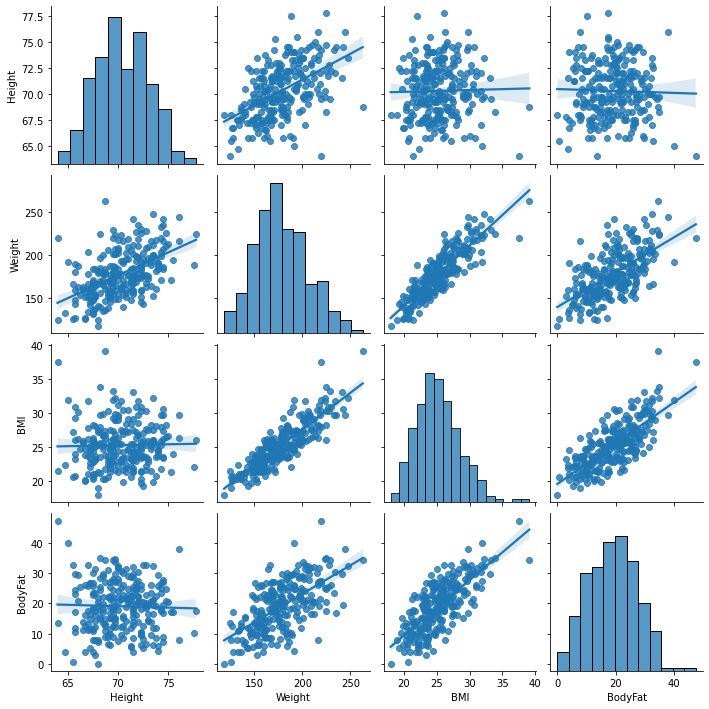

In [3]:
sns.pairplot(df[["Height", "Weight", "BMI", "BodyFat"]], kind="reg")

In [4]:
weight_Fat = thinkstats2.Corr(df["Weight"], df["BodyFat"])
height_Fat = thinkstats2.Corr(df["Height"], df["BodyFat"])
BMI_Fat = thinkstats2.Corr(df["BMI"], df["BodyFat"])
print("Weight v Fat Corr:", weight_Fat)
print("Height v Fat Corr:", height_Fat)
print("BMI v Fat Corr:", BMI_Fat)

Weight v Fat Corr: 0.6172994386336451
Height v Fat Corr: -0.029389589288215463
BMI v Fat Corr: 0.7447979099128766


In [5]:
d = pd.read_csv("DirectMail.txt", sep="\t")
d.head()

,AGE,CRED,MS,HEQ,INCOME,DEPC,MOB,MILEAGE,RESTYPE,GENDER,...,resp,female,HOME,CONDO,COOP,renter,emp1,emp2,msn,cuscode
0,20,543.0,U,0.1,20,N,Y,14.418,HOME,M,...,0,0,1,0,0,1,1,0,0,1
1,18,445.0,U,0.1,20,N,Y,0.311,HOME,M,...,0,0,1,0,0,1,0,0,0,2
2,19,423.0,U,0.1,20,N,N,17.876,HOME,M,...,0,0,1,0,0,1,1,0,0,3
3,18,416.0,X,0.1,20,N,Y,17.084,HOME,F,...,0,1,1,0,0,1,1,0,0,4
4,18,522.0,U,0.1,20,Y,Y,16.510,HOME,F,...,0,1,1,0,0,1,1,0,0,5


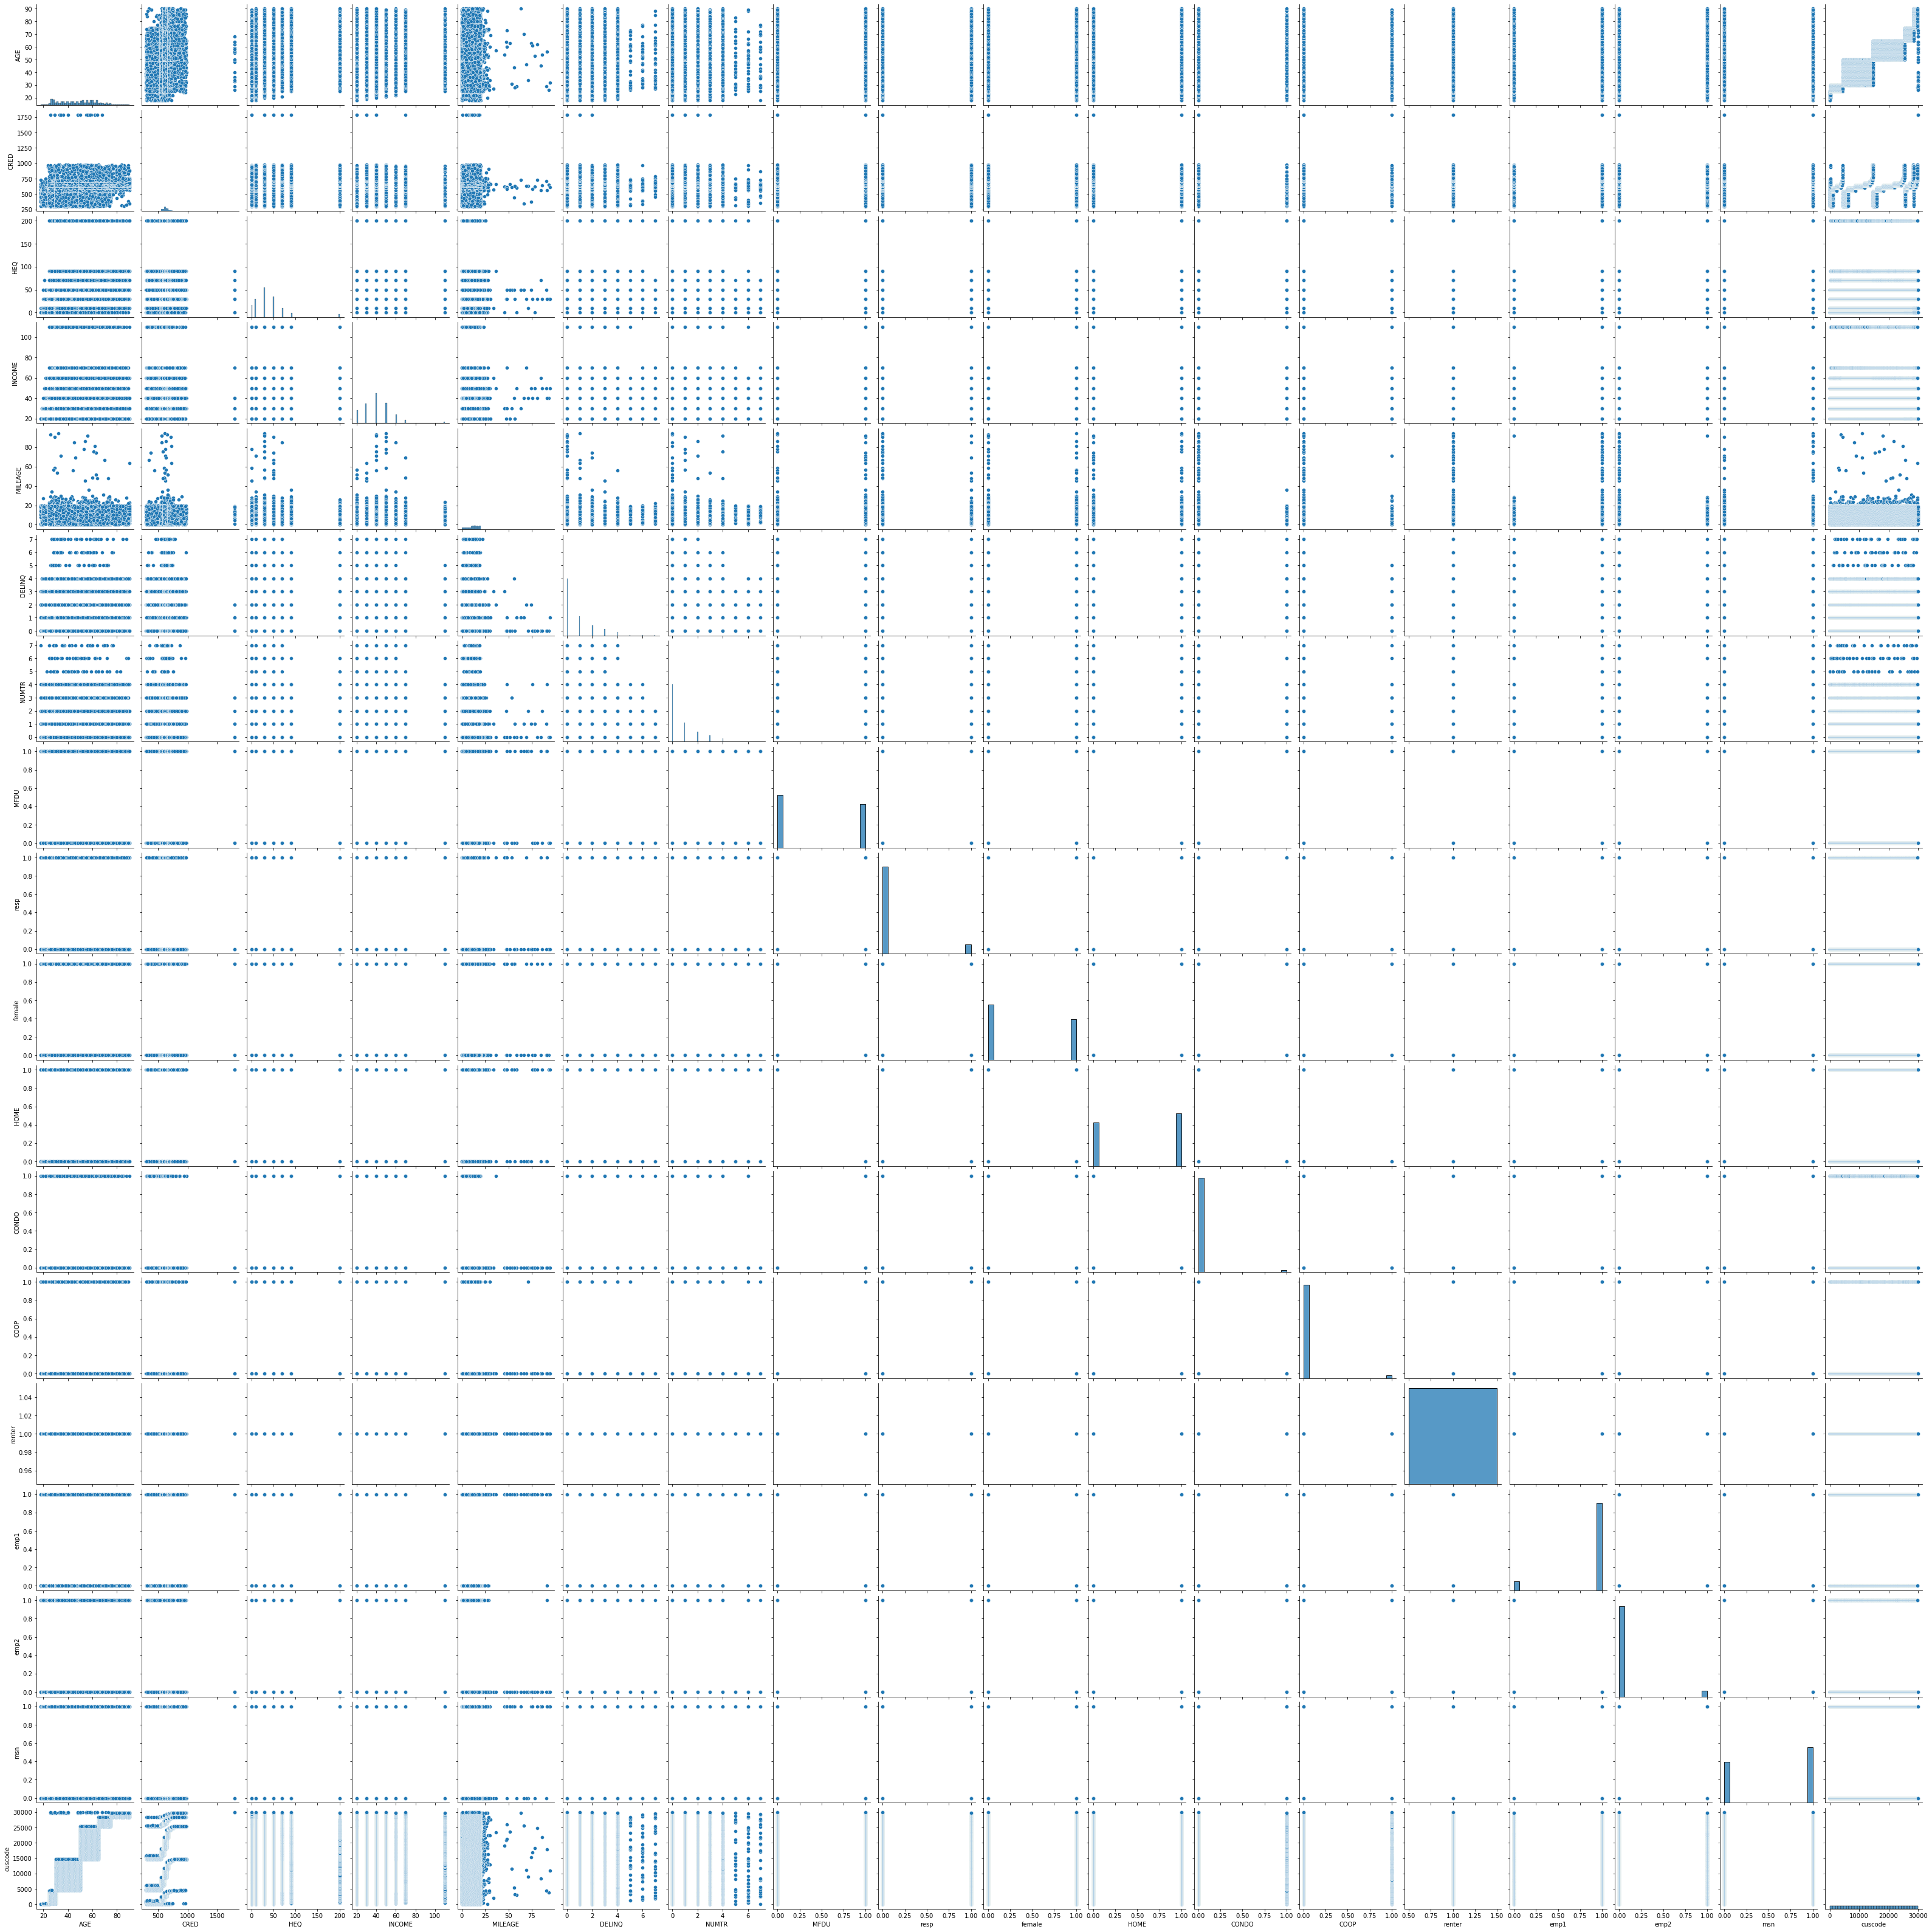

In [6]:
sns.pairplot(d)

In [8]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
d_oh = enc.fit_transform(d).toarray()
d_oh

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

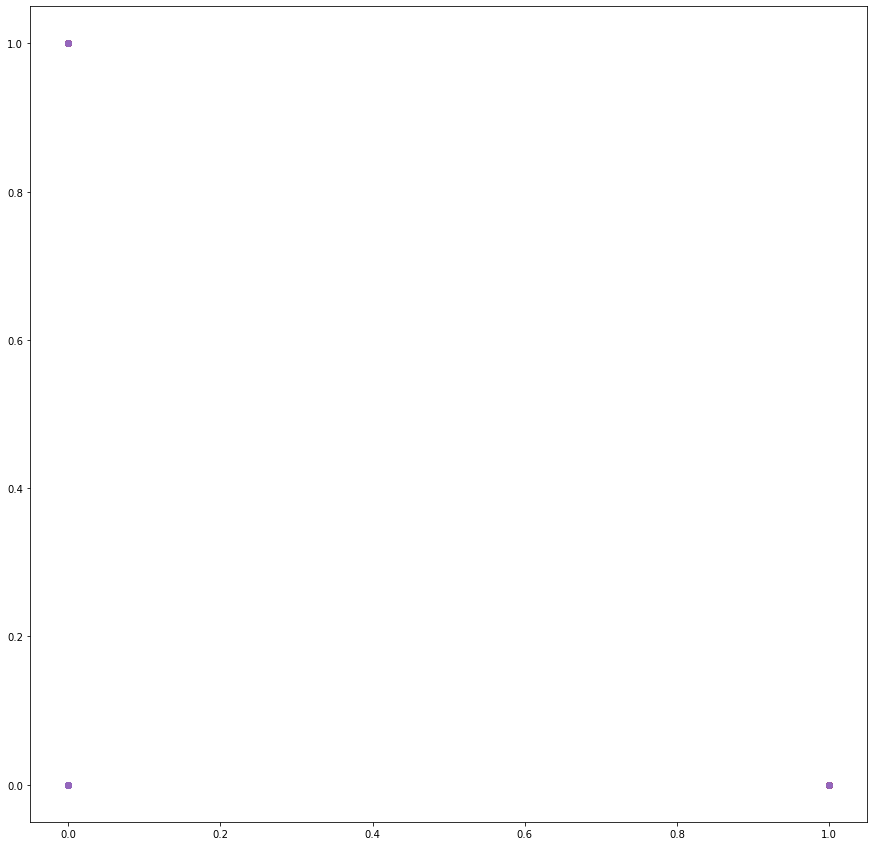

In [13]:
# affinity propagation clustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define dataset
#X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

X = d_oh[:5000]
# define the model
#model = AffinityPropagation(damping=0.9)
model = AgglomerativeClustering(n_clusters=5)
# fit the model
model.fit(X)
# assign a cluster to each example
#yhat = model.predict(X)
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = np.where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()